<h1>Pendahuluan</h1>
<p>Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.</p>

Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu https://covid19-api.org/.

 

In [1]:
import json
import numpy as np
import pandas as pd
import requests

Buat fungsi python get_json dengan parameter api_url. fungsi ini akan mengembalikan value berupa python dictionary jika status_code yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah None.

In [2]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

<h2>Memanggil API </h2>

Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. Gunakan parameter record_date untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan record_date '2020-11-20', dan masukkan hasil respon api ke variable df_covid_worldwide.

Untuk mendapatkan dataframe covid19, gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json() Print sample data covid dengan menggunakan head() function.

In [3]:
record_date = '2020-11-20'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update     cases  deaths  recovered
0      US  2020-11-19T23:26:27  11689545  252290    4348089
1      IN  2020-11-19T23:26:27   8958483  131578    8383602
2      BR  2020-11-19T23:26:27   5945849  167455    5383385
3      FR  2020-11-19T23:26:27   2136867   47201     153145
4      RU  2020-11-19T23:26:27   1998966   34525    1514945


<ipython-input-3-0b58847eccc6>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format YYYY-mm-dd HH:MM:SS. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.

In [4]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

<h2>Mengambil Data Countries</h2>
Buatlah dataframe countries dengan memanggil variable countries_url ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.

Akhirnya cetaklah lima data teratas dari dataframe countries (df_countries).



In [5]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries)

               name country
0       Afghanistan      AF
1           Albania      AL
2           Algeria      DZ
3           Andorra      AD
4            Angola      AO
..              ...     ...
204        Viet Nam      VN
205  Western Sahara      EH
206           Yemen      YE
207          Zambia      ZM
208        Zimbabwe      ZW

[209 rows x 2 columns]


<ipython-input-5-cc9fa3b34052>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries = pd.io.json.json_normalize(get_json(countries_url))


<h2>Merge Covid19 Data dan Countries</h2>

Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().

In [6]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update     cases  deaths  recovered                      name
0      US  2020-11-19  11689545  252290    4348089  United States of America
1      IN  2020-11-19   8958483  131578    8383602                     India
2      BR  2020-11-19   5945849  167455    5383385                    Brazil
3      FR  2020-11-19   2136867   47201     153145                    France
4      RU  2020-11-19   1998966   34525    1514945        Russian Federation


<h2>Menghitung Fatality Ratio</h2>

Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

In [7]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

<h2>Negara-negara dengan Fatality Ratio Tertinggi</h2>

Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

In [8]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
152,YE,2020-11-19,2086,608,1428,Yemen,0.291467
192,EH,2020-11-19,10,1,8,Western Sahara,0.100000
10,MX,2020-11-19,1015071,99528,762025,Mexico,0.098050
104,SD,2020-11-19,15047,1175,9609,Sudan,0.078089
37,EC,2020-11-19,183246,13073,160639,Ecuador,0.071341
155,TD,2020-11-19,1620,101,1463,Chad,0.062346
42,BO,2020-11-19,143569,8875,118333,Plurinational State of Bolivia,0.061817
54,EG,2020-11-19,111955,6508,101564,Egypt,0.058130
184,FJ,2020-11-19,35,2,32,Fiji,0.057143
156,LR,2020-11-19,1539,82,1331,Liberia,0.053281


<h2>Visualisasi Negara dengan Fatality Ratio Tertinggi</h2>
<p>Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.</p>
<p>Variabel x axis adalah kolom name, dan kolom y atau value nya adalah kolom fatality_ratio dan gunakan fungsi plt.bar([value x axis, value y axis]).</p>
<p>Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.</p>

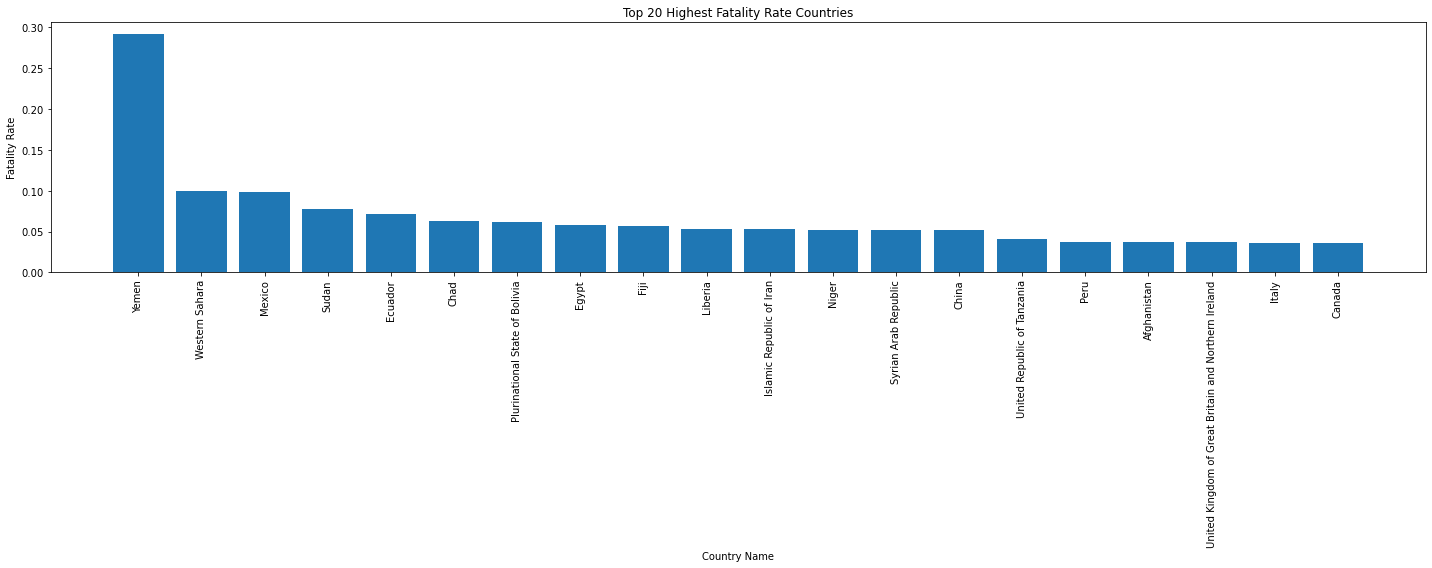

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2>Menggabungkan Dataframe</h2>
<p>Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:</p>
<ul>
    <li>MY -> Malaysia,</li>
    <li>SG -> Singapure,</li>
    <li>TH -> Thailand,</li>
    <li>VN -> Vietnam.</li>
</ul>
<p>Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.</p>
<p>Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().</p>
<p>Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.</p>
<p>Cetaklah lima data teratas dari dataframe yang telah dibentuk.</p>

In [10]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
print(df_covid_timeline_merged)

<ipython-input-10-d201a4687209>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))


     country last_update  cases  deaths  recovered
0         VN  2020-11-22   1306      35       1142
1         VN  2020-11-21   1306      35       1142
2         VN  2020-11-20   1305      35       1142
3         VN  2020-11-19   1304      35       1142
4         VN  2020-11-18   1300      35       1124
...      ...         ...    ...     ...        ...
1403      ID  2020-03-10     27       0          2
1404      ID  2020-03-09     19       0          0
1405      ID  2020-03-08      6       0          0
1406      ID  2020-03-06      4       0          0
1407      ID  2020-03-02      2       0          0

[1408 rows x 5 columns]


<h2>Merge Data Covid19 Dengan Data Country</h2>
<p>Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.</p>

In [11]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged , df_countries , on='country')

In [12]:
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-11-22,1306,35,1142,Viet Nam
1,VN,2020-11-21,1306,35,1142,Viet Nam
2,VN,2020-11-20,1305,35,1142,Viet Nam
3,VN,2020-11-19,1304,35,1142,Viet Nam
4,VN,2020-11-18,1300,35,1124,Viet Nam
...,...,...,...,...,...,...
1403,ID,2020-03-10,27,0,2,Indonesia
1404,ID,2020-03-09,19,0,0,Indonesia
1405,ID,2020-03-08,6,0,0,Indonesia
1406,ID,2020-03-06,4,0,0,Indonesia


<h2>Kasus Covid-19 di ASEAN pada Bulan Maret 2020</h2>
<p>Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format datetime.date menggunakan format YYYY, mm, dd.</p>

In [13]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

In [14]:
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-11-22,1306,35,1142,Viet Nam
1,VN,2020-11-21,1306,35,1142,Viet Nam
2,VN,2020-11-20,1305,35,1142,Viet Nam
3,VN,2020-11-19,1304,35,1142,Viet Nam
4,VN,2020-11-18,1300,35,1124,Viet Nam
...,...,...,...,...,...,...
1403,ID,2020-03-10,27,0,2,Indonesia
1404,ID,2020-03-09,19,0,0,Indonesia
1405,ID,2020-03-08,6,0,0,Indonesia
1406,ID,2020-03-06,4,0,0,Indonesia


<h2>Visualisasi Kasus Covid-19 di ASEAN</h2>
<p>Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.</p>

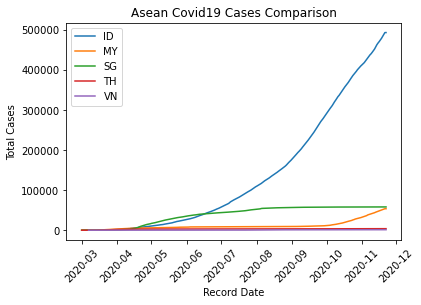

In [15]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.title('Asean Covid19 Cases Comparison')
plt.show()

<p>Dari visualisasi yang telah dilakukan dapat dilihat bahwa kasus covid-19 di Indonesia masih sangat tinggi dan kurvanya masih terus naik dari bulan Maret hingga bulan November. Jika dibandingkan dengan negara-negara tetangganya seperti Malaysia, Singapura, Thailand, dan Vietnam kasus covid-19 di negara-negara tesebut jauh lebih rendah dibandingkan dengan negara kita. Oleh karena itu, langkah-langkah pencegahan penularan harus dilakukan seperti mematuhi protokol kesehatan dan ketegasan pemerintah dalam menegakkan protokol kesehatan.</p>